In [2]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
import warnings
import os
import glob
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.models import Model
from keras.layers import Input, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping  
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [3]:
train_dir='C:/Users/N Vishnu/Web page/unstructure Model/DATASET/DATASET/train/train'
test_dir='C:/Users/N Vishnu/Web page/unstructure Model/DATASET/DATASET/test/test'


In [4]:
batch_size = 10
epochs = 5
img_height = 224
img_width = 224

In [5]:
train_image_generator = ImageDataGenerator(rescale=1./255)  
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,directory=train_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 999 images belonging to 2 classes.


In [6]:
val_image_generator = ImageDataGenerator(rescale=1./255)  
val_data_gen = val_image_generator .flow_from_directory(batch_size=batch_size,directory=test_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 412 images belonging to 2 classes.


In [8]:
# img_width,img_height =224,224
# input_shape=(img_width,img_height,3)

In [9]:
# model = Sequential()
# model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
# model.add(MaxPooling2D(pool_size=(3, 3)))
# model.add(Conv2D(32, (3, 3),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(64, (3, 3),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))   
# model.add(Flatten())
# model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.25))
# model.add(Dense(128,activation='relu'))          
# model.add(Dense(2,activation='softmax'))

In [10]:
input_shape = (224, 224, 3) 
inputs = Input(shape=input_shape)

# Block 1 with Batch Normalization
x = Conv2D(32, (5, 5), padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(3, 3))(x)

# Block 2 with Batch Normalization
x = Conv2D(32, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Block 3 with Batch Normalization
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Flatten and Fully Connected Layers
x = Flatten()(x)
x = Dense(512)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.25)(x)
x = Dense(128, activation='relu')(x)

outputs = Dense(2, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',       
    patience=5,               # Number of epochs to wait before stopping if no improvement
    restore_best_weights=True
)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 batch_normalization (Batch  (None, 224, 224, 32)      128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 32)        9248  

In [12]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [13]:
history = model.fit(
    train_data_gen[0][0], train_data_gen[0][1],  
    epochs=20, 
    validation_data=(val_data_gen[0][0], val_data_gen[0][1]),
    callbacks=[early_stopping]  
)

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.7836 - accuracy: 0.6000 - val_loss: 0.4919 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 425ms/step - loss: 0.0210 - accuracy: 1.0000 - val_loss: 0.5410 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 453ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.5186 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 481ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.4669 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 481ms/step - loss: 5.9934e-04 - accuracy: 1.0000 - val_loss: 0.4084 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 1s 568ms/step - loss: 3.9626e-04 - accuracy: 1.0000 - val_loss: 0.3478 - val_accuracy: 0.7000
Epoch 7/20
1/1 [==============================] - 1s 615ms/step - loss: 5.1942e-04 - accuracy: 1.0000 - val_loss: 0.3091 - val_accuracy: 1.0000
Epoch 8/20


In [15]:
y=np.concatenate([val_data_gen.next()[1] for i in range(val_data_gen.__len__())])
true_labels=np.argmax(y, axis=-1)
prediction= model.predict(val_data_gen, verbose=2)
prediction=np.argmax(prediction, axis=-1)

42/42 - 5s - 5s/epoch - 123ms/step


In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [17]:
cm = confusion_matrix(y_true=true_labels, y_pred=prediction)

In [18]:
cm_plot_labels = ['pancreatic_tumor','Normal']

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

Confusion matrix, without normalization
[[224   1]
 [  0 187]]
Accuracy: 0.998
Precision: 0.995
Recall: 0.998
F-Measure: 0.998


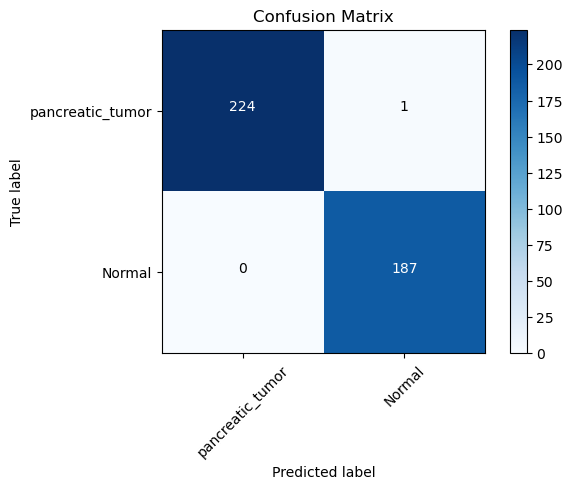

In [19]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

acc=accuracy_score(true_labels,prediction) 
print('Accuracy: %.3f' % acc)

precision = precision_score(true_labels,prediction,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)

recall = recall_score(true_labels,prediction, average='micro')
print('Recall: %.3f' % recall)

score = f1_score(true_labels,prediction, average='micro')
print('F-Measure: %.3f' % score)

In [20]:
save_path = r'C:\Users\N Vishnu\Web page\save.h5'
model.save(save_path)


C:\Users\N Vishnu\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
